In [37]:
!pip install mlxtend --upgrade

In [38]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [39]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
link_df=pd.read_csv('/content/drive/MyDrive/datadmg/links.csv')
movie_df=pd.read_csv('/content/drive/MyDrive/datadmg/movies.csv')
rating_df=pd.read_csv('/content/drive/MyDrive/datadmg/ratings.csv')
tag_df=pd.read_csv('/content/drive/MyDrive/datadmg/tags.csv')

In [41]:
rating_df.drop('timestamp',axis=1)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [42]:
df = pd.merge(rating_df, movie_df, left_on='movieId',right_on='movieId')
df = df.drop_duplicates(['userId','title'])
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [43]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

As we can see there are no nan / null values in the dataset for movies.csv and ratings.csv

In [44]:
most_rated = df.groupby('title')['rating'].count().sort_values(ascending=False)
most_rated.head(20)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [45]:
most_rated.describe()

count    9719.000000
mean       10.374730
std        22.405731
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: rating, dtype: float64

In [46]:
movie_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
movie_ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
movie_ratings

,rating,number of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


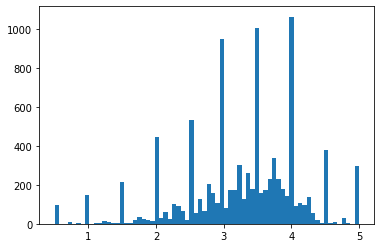

In [47]:
plt.hist(movie_ratings['rating'], bins = 70)
plt.show()

In [48]:
common_tags = tag_df.groupby('tag')['tag'].count().sort_values(ascending=False)
common_tags.head(20)

tag
In Netflix queue      131
atmospheric            36
thought-provoking      24
superhero              24
surreal                23
funny                  23
Disney                 23
religion               22
quirky                 21
psychology             21
dark comedy            21
sci-fi                 21
suspense               20
twist ending           19
crime                  19
visually appealing     19
politics               18
mental illness         16
music                  16
time travel            16
Name: tag, dtype: int64

In [49]:
df2 = pd.merge(tag_df, movie_df, left_on='movieId',right_on='movieId')
commonly_reviewed_movies = df2.groupby('title')['tag'].count().sort_values(ascending=False)
commonly_reviewed_movies.head(20)

title
Pulp Fiction (1994)                                               181
Fight Club (1999)                                                  54
2001: A Space Odyssey (1968)                                       41
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     35
Eternal Sunshine of the Spotless Mind (2004)                       34
Big Lebowski, The (1998)                                           32
Donnie Darko (2001)                                                29
Star Wars: Episode IV - A New Hope (1977)                          26
Inception (2010)                                                   26
Suicide Squad (2016)                                               19
Avatar (2009)                                                      18
In the Mood For Love (Fa yeung nin wa) (2000)                      18
Eraserhead (1977)                                                  17
Pi (1998)                                                          17
Avengers: Infi

In [50]:
df_pivot = df.pivot(index='userId',columns='title',values='rating').fillna(0)
df_pivot = df_pivot.astype('int64')
df_pivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,4,3,0,0,0


In [51]:
def map(rating):
  if rating < 1:
    return False
  else:
    return True

df_pivot = df_pivot.applymap(map)
df_pivot


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [52]:
frequent_itemsets = apriori(df_pivot,min_support=0.1, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.178689,(2001: A Space Odyssey (1968))
1,0.129508,(300 (2007))
2,0.119672,"(40-Year-Old Virgin, The (2005))"
3,0.260656,(Ace Ventura: Pet Detective (1994))
4,0.144262,(Ace Ventura: When Nature Calls (1995))


In [53]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [ ]:
rules = association_rules(frequent_itemsets, metric='lift',min_threshold = 0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alien (1979)),(2001: A Space Odyssey (1968)),0.237705,0.178689,0.122951,0.517241,2.894654,0.080476,1.701288
1,(2001: A Space Odyssey (1968)),(Alien (1979)),0.178689,0.237705,0.122951,0.688073,2.894654,0.080476,2.443828
2,(Aliens (1986)),(2001: A Space Odyssey (1968)),0.206557,0.178689,0.116393,0.563492,3.153488,0.079484,1.881550
3,(2001: A Space Odyssey (1968)),(Aliens (1986)),0.178689,0.206557,0.116393,0.651376,3.153488,0.079484,2.275928
4,(American Beauty (1999)),(2001: A Space Odyssey (1968)),0.332787,0.178689,0.114754,0.344828,1.929769,0.055289,1.253581
...,...,...,...,...,...,...,...,...,...
2985997,(Star Wars: Episode IV - A New Hope (1977)),"(Forrest Gump (1994), Matrix, The (1999), Lord...",0.409836,0.103279,0.101639,0.248000,2.401270,0.059312,1.192449
2985998,"(Lord of the Rings: The Two Towers, The (2002))","(Forrest Gump (1994), Matrix, The (1999), Lord...",0.306557,0.103279,0.101639,0.331551,3.210254,0.069979,1.341495
2985999,(Star Wars: Episode VI - Return of the Jedi (1...,"(Forrest Gump (1994), Matrix, The (1999), Lord...",0.321311,0.106557,0.101639,0.316327,2.968603,0.067401,1.306827
2986000,(Lord of the Rings: The Fellowship of the Ring...,"(Forrest Gump (1994), Matrix, The (1999), Lord...",0.321311,0.104918,0.101639,0.316327,3.014987,0.067928,1.309224


In [ ]:
rules.to_csv('rules.csv')
!cp data.csv "drive/My Drive/datasets"

In [ ]:
mer = pd.merge(movie_df, rating_df, left_on='movieId', right_on='movieId')
mer = mer.groupby(['title','genres']).mean()
mer = mer.drop(['movieId','userId','timestamp'],axis=1)
mer = mer.reset_index()


In [ ]:
def find_more(req, rw,ans):
  rw = rw.split('|')
  cn = 0
  for i in range(0,len(mer)):
    st = mer.iloc[i]['genres']
    st = st.split('|')
    for j in range(0,len(st)):
      if(st[j] in rw):
        ans[mer.iloc[i]['title']] = 0
        cn+=1
        break
    if cn==req:
      break;
  return ans




In [ ]:
#recommend
inp = 'Dark Knight, The(2008)'
inp = inp.split(',')
ans = {}
for ik in range(len(inp)):
  rw = str(movie_df[movie_df['title'] == inp[ik]]['genres'])
  results = rules[rules["antecedents"].apply(lambda x: inp[ik] in str(x))].groupby(['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(4)
  results = results.reset_index()
  results = results.to_numpy()
  for i in range(0,4):
    if i >= len(results):
      ans = find_more(4-i,rw,ans)
      break
    else:
      ans[results[i,1]] = float(results[i,2])
cn = 0
ls = {}
for w in sorted(ans, key=ans.get, reverse=True):
  for x in w:
    ls.add(x)
    if len(ls) ==4:
      break
print(ls)


In [ ]:
from mlxtend.frequent_patterns import fpmax
maxfreqitemsets = fpmax(df_pivot, min_support=0.1, use_colnames=True)
maxfreqitemsets

In [ ]:
edges = []
for i in range(len(rules)):
  edges.append([rules.iloc[i]['antecedents'], rules.iloc[i]['consequents']])

G = nx.Graph()
G.add_edges_from(edges)


KeyboardInterrupt: ignored

In [ ]:
import networkx as nx
import warnings
import matplotlib.patches as mpatches
colors = []
cn = 0
for node in G:
  found = 0
  for x in node:
    if x in maxfre:
      print(x)
      found=1
      colors.append('green')
  cn = 1
  if found == 0: 
    colors.append('blue') 

fig, ax=plt.subplots(figsize = (100,100))  
nx.draw(G, node_color=colors, with_labels=True)
plt.legend(["a","b"])
green_patch = mpatches.Patch(color='green', label='Maximal Frequent Sets of size 2')
blue_patch = mpatches.Patch(color='blue', label='Non-Maximal sets')
plt.legend(handles=[green_patch,blue_patch])
plt.savefig("MaxFreqItemsets.pdf")
plt.show()